In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sklearn

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
car = pd.read_csv("C:/Users/Harsha Vardhan/Downloads/car_price_prediction_.csv")

In [8]:
car.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
car.shape

(2500, 10)

In [12]:
car.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [14]:
car["Brand"].value_counts()

Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Tesla       348
Ford        347
Name: count, dtype: int64

In [15]:
car["Fuel Type"].value_counts()

Fuel Type
Diesel      655
Petrol      630
Electric    614
Hybrid      601
Name: count, dtype: int64

In [16]:
car["Transmission"].value_counts()

Transmission
Manual       1308
Automatic    1192
Name: count, dtype: int64

In [17]:
car["Condition"].value_counts()

Condition
Used        855
Like New    836
New         809
Name: count, dtype: int64

In [18]:
car["Model"].value_counts()

Model
Fiesta      103
Corolla     103
A3           98
A4           96
CR-V         95
Q7           95
5 Series     93
Model X      93
Prius        93
3 Series     93
X3           92
GLA          92
C-Class      92
Camry        90
E-Class      89
Model Y      89
Fit          89
RAV4         88
Accord       88
Model 3      87
Explorer     86
Focus        81
GLC          80
Civic        80
X5           80
Model S      79
Q5           79
Mustang      77
Name: count, dtype: int64

In [20]:
l_Brand = LabelEncoder()
l_Fuel_Type = LabelEncoder()
l_Transmission = LabelEncoder()
l_Condition = LabelEncoder()
l_Model = LabelEncoder()

In [21]:
car["brand"]=l_Brand.fit_transform(car["Brand"])

In [22]:
car["condition"]=l_Condition.fit_transform(car["Condition"])
car["Fuel_Type"]=l_Fuel_Type.fit_transform(car["Fuel Type"])
car["transmission"]=l_Transmission.fit_transform(car["Transmission"])
car["model"]=l_Model.fit_transform(car["Model"])

In [23]:
car.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,brand,condition,Fuel_Type,transmission,model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X,5,1,3,1,19
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series,1,2,1,1,1
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4,0,1,1,1,3
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y,5,1,0,0,20
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang,2,0,0,1,21


In [24]:
# drop the columns
car.drop(["Brand","Fuel Type","Transmission","Condition","Model"],axis=1,inplace=True)

In [25]:
car.head()

,Car ID,Year,Engine Size,Mileage,Price,brand,condition,Fuel_Type,transmission,model
0,1,2016,2.3,114832,26613.92,5,1,3,1,19
1,2,2018,4.4,143190,14679.61,1,2,1,1,1
2,3,2013,4.5,181601,44402.61,0,1,1,1,3
3,4,2011,4.1,68682,86374.33,5,1,0,0,20
4,5,2009,2.6,223009,73577.10,2,0,0,1,21


In [26]:
car.drop(["Car ID"],axis=1,inplace=True)

In [49]:
car.drop(["Year"],axis=1,inplace=True)

In [50]:
x=car.drop("Price",axis=1)
y=car["Price"]

In [51]:
x.shape

(2500, 7)

In [52]:
y.shape

(2500,)

In [53]:
import seaborn as sns

In [54]:
import matplotlib.pyplot as plt

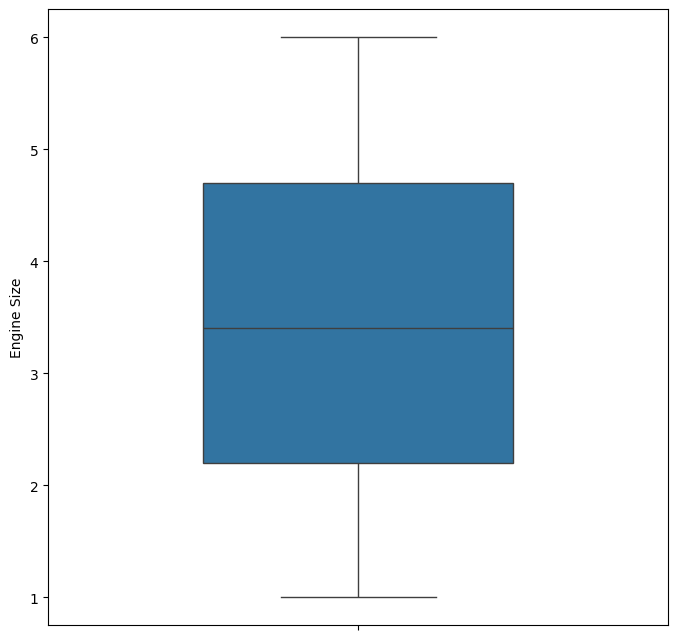

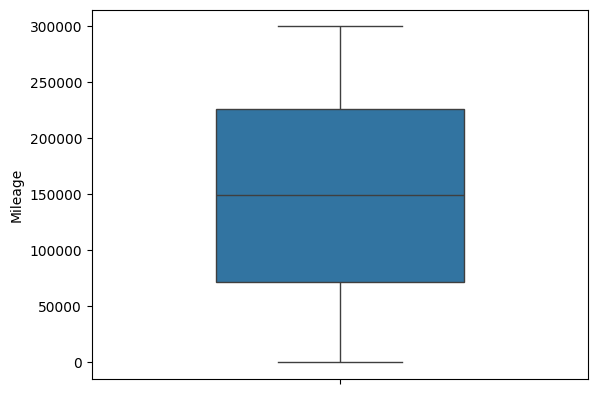

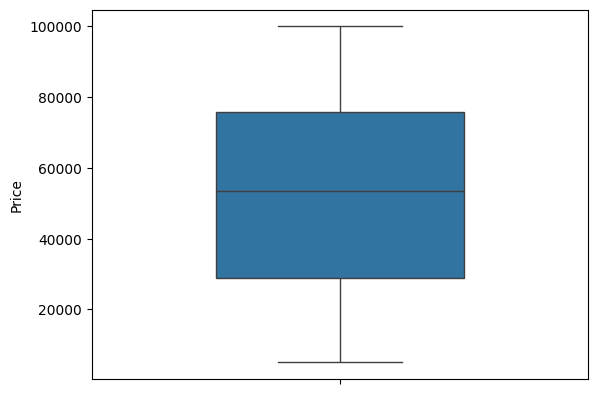

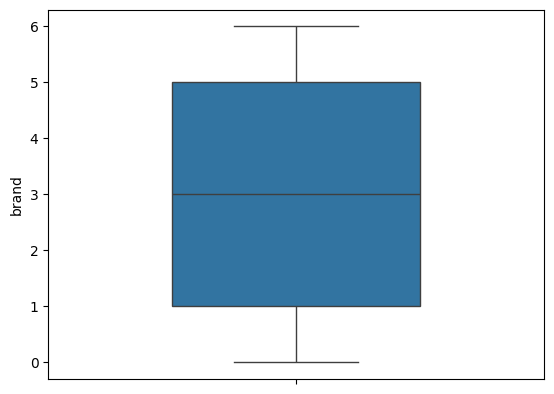

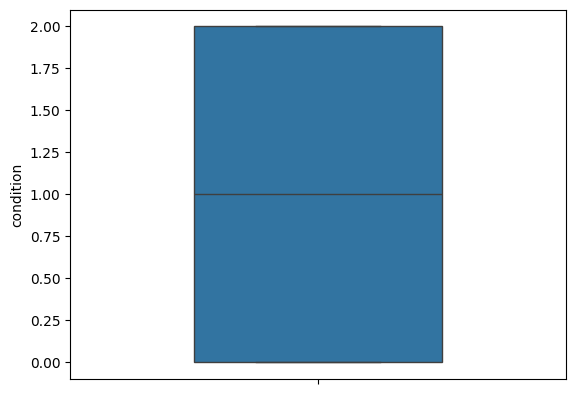

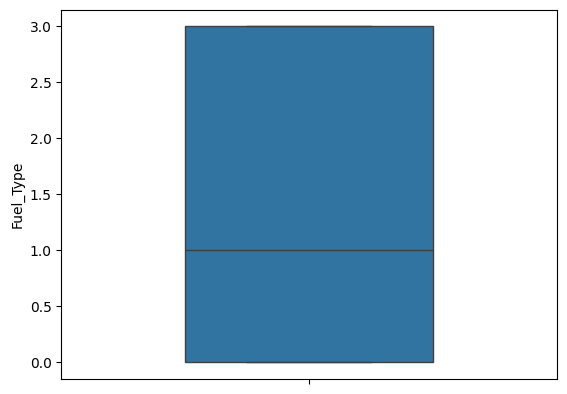

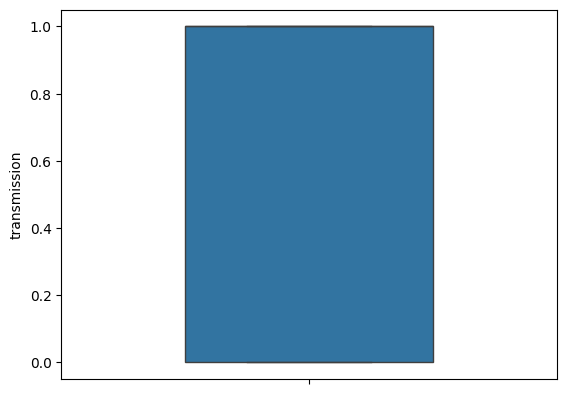

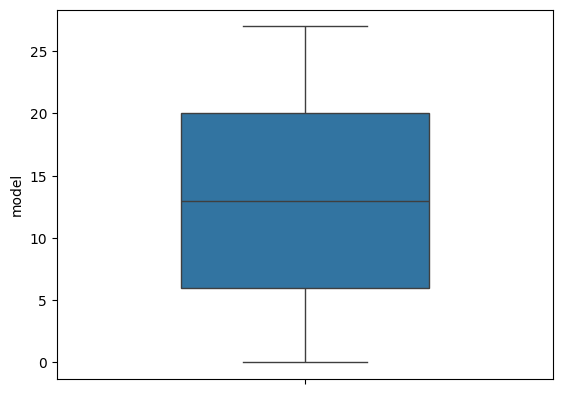

In [55]:
plt.figure(figsize=(8,8))
for col in car.columns:
    sns.boxplot(car[col],width=0.5)
    plt.show()

In [56]:
# standardize the data
scaler = StandardScaler()

In [57]:
scaler.fit(x)

StandardScaler()

In [58]:
x = scaler.fit_transform(x)

In [59]:
x

array([[-0.8138477 , -0.39723441,  0.98925875, ...,  1.34259347,
         0.95462819,  0.70878198],
       [ 0.65287175, -0.07462649, -0.99084284, ..., -0.42677062,
         0.95462819, -1.5121768 ],
       [ 0.72271553,  0.36234696, -1.48586823, ..., -0.42677062,
         0.95462819, -1.2654036 ],
       ...,
       [-1.65197311,  1.40015747, -0.49581744, ...,  0.45791142,
         0.95462819, -0.15492421],
       [ 0.72271553,  0.90343592, -1.48586823, ..., -1.31145266,
         0.95462819,  1.20232837],
       [ 0.79255932, -0.78236625,  1.48428415, ..., -1.31145266,
        -1.04752825,  1.44910157]])

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [61]:
x_train.shape

(2000, 7)

In [62]:
x_test.shape

(500, 7)

In [63]:
y_train.shape

(2000,)

In [64]:
y_test.shape

(500,)

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
model=LinearRegression()

In [106]:
model.fit(x_train,y_train)

LinearRegression()

In [107]:
y_pred=model.predict(x_test)

In [108]:
y_pred

array([54933.62738709, 52692.04206848, 52526.55411619, 52461.69639591,
       51271.66648342, 50361.50612833, 56552.6440825 , 49606.06016818,
       51149.47244037, 55454.96367777, 54644.5584003 , 54534.03154683,
       53756.96719183, 50005.97827201, 51436.37627818, 51154.39650579,
       54388.19983453, 49657.19213856, 52852.81343003, 53225.29797024,
       53215.74343383, 53926.8062817 , 53972.43036976, 50204.35759723,
       53890.93624328, 53931.03824701, 49978.31014055, 50099.60328675,
       50588.66380276, 56855.46711295, 48852.24770535, 55076.81130429,
       53180.85156829, 52497.97520274, 52713.88745746, 52569.02936119,
       51636.81897919, 51666.92432387, 50559.77596418, 48477.21961477,
       52036.20150549, 52596.0099026 , 49981.95851157, 50914.06312227,
       53748.04892026, 52944.83656302, 50425.20515493, 53366.52657602,
       53618.40946865, 54250.42666236, 50579.93016549, 55502.46864534,
       55567.04816889, 47917.09812302, 50199.94170048, 51001.85885741,
      